## Name: Naikdhure Neha Rajendra
### Roll No.: CS8A64
### Batch A-3
---

# Experiment - 6: Perform content based analysis (topic , issue , trend, sentiment/opinion analysis,image) of social media data for business.

#### Topic -:Social Media Analysis for Himalaya Wellness Company

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import LatentDirichletAllocation
import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 12)

[nltk_data] Downloading package stopwords to C:\Users\Pankaj
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'textblob'

In [5]:
tweets_df = pd.read_json("/content/gdrive/MyDrive/Semester-8/Social_Media_Analytics/Experiments/Experiment-7/Twitter_Search_Query_Data.json" ,lines=True)

In [6]:
user_part = tweets_df["user"].apply(pd.Series)

In [8]:
new_tweet_df = pd.concat([tweets_df,user_part],axis=1)

In [11]:
new_tweet_df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,protected,link,profileImageUrl,profileBannerUrl,label,description,descriptionUrls,linkTcourl,linkUrl,url
0,snscrape.modules.twitter.Tweet,https://twitter.com/mjsalmankhan/status/163716...,2023-03-18 18:39:02+00:00,@HimalayaIndia \nPlz improve your baby diaper ...,@HimalayaIndia \nPlz improve your baby diaper ...,1637161704797749249,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,False,None,https://pbs.twimg.com/profile_images/161246152...,None,None,Social Worker 🌄,None,None,None,https://twitter.com/mjsalmankhan
1,snscrape.modules.twitter.Tweet,https://twitter.com/medianews4u/status/1636671...,2023-03-17 10:09:14+00:00,Himalaya urges women to embrace their inner st...,Himalaya urges women to embrace their inner st...,1636671021397983233,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,1,...,False,"{'_type': 'snscrape.modules.twitter.TextLink',...",https://pbs.twimg.com/profile_images/109661145...,https://pbs.twimg.com/profile_banners/84876958...,None,"Media News, Analysis, Happenings, Latest Buzz",None,https://t.co/tm9cCuOLLo,http://www.medianews4u.com,https://twitter.com/medianews4u
2,snscrape.modules.twitter.Tweet,https://twitter.com/AtmakuriLahari/status/1636...,2023-03-17 10:06:50+00:00,At this point @HimalayaIndia should consider ...,At this point @HimalayaIndia should consider ...,1636670419255312386,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,False,None,https://pbs.twimg.com/profile_images/161600420...,https://pbs.twimg.com/profile_banners/16153445...,None,Stay Gold\nLove Yourself,None,None,None,https://twitter.com/AtmakuriLahari
3,snscrape.modules.twitter.Tweet,https://twitter.com/TheQuint/status/1636618253...,2023-03-17 06:39:33+00:00,"Partner | In the Women’s cricket league, RCB p...","Partner | In the Women’s cricket league, RCB p...",1636618253853138944,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,False,"{'_type': 'snscrape.modules.twitter.TextLink',...",https://pbs.twimg.com/profile_images/117022268...,https://pbs.twimg.com/profile_banners/29822698...,None,Mobile-first digital news platform. | SUPPORT ...,[{'_type': 'snscrape.modules.twitter.TextLink'...,https://t.co/CuWWzSKzb7,https://www.thequint.com/,https://twitter.com/TheQuint
4,snscrape.modules.twitter.Tweet,https://twitter.com/INDIACSR/status/1635993220...,2023-03-15 13:15:53+00:00,CSR: #HimalayaBabyCare helps traveling mothers...,CSR: #HimalayaBabyCare helps traveling mothers...,1635993220231331841,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,4,...,False,"{'_type': 'snscrape.modules.twitter.TextLink',...",https://pbs.twimg.com/profile_images/155163122...,https://pbs.twimg.com/profile_banners/15448334...,None,INDIACSR (IndiaCSR.in) is the CSR Network of I...,[{'_type': 'snscrape.modules.twitter.TextLink'...,https://t.co/RK4bvq94Jp,http://IndiaCSR.in,https://twitter.com/INDIACSR


In [9]:
new_tweet_df.columns

Index(['_type', 'url', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'links',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card', 'viewCount', 'vibe', 'content', 'outlinks',
       'outlinksss', 'tcooutlinks', 'tcooutlinksss', 'username', '_type',
       'username', 'id', 'displayname', 'rawDescription',
       'renderedDescription', 'descriptionLinks', 'verified', 'created',
       'followersCount', 'friendsCount', 'statusesCount', 'favouritesCount',
       'listedCount', 'mediaCount', 'location', 'protected', 'link',
       'profileImageUrl', 'profileBannerUrl', 'label', 'description',
       'descriptionUrls', 'linkTcourl', 'linkUrl', 'url'],
      dtype='object')

In [12]:
new_tweet_df.shape

(1212, 62)

In [13]:
new_tweet_df=new_tweet_df.drop_duplicates("renderedContent")

In [14]:
new_tweet_df.shape

(1181, 62)

# Location Analysis

In [15]:
Top_Location_Of_tweet= new_tweet_df["location"].value_counts().head(50)

In [16]:
Top_Location_Of_tweet

                                  375
India                              89
Mumbai, India                      57
Hyderabad, India                   40
Maharashtra, India                 29
New Delhi, India                   29
Bengaluru, India                   25
Bhubaneshwar, India                22
Mumbai                             20
Tamil Nadu, India                  14
Chennai, India                     12
Uttar Pradesh, India               12
Abu Dhabi, United Arab Emirate     11
India                              10
 India                              9
Lucknow, India                      8
Patna, India                        8
Prayagraj: Sun-Fri, Delhi: Sat      7
Noida, India                        7
Jaipur, India                       7
india                               7
Karnataka, India                    6
Gurgaon, India                      6
Hyderabad                           6
Indore, India                       6
Gujarat, India                      6
Kolkata, Ind

# Issue Analysis

In [18]:
stop = stopwords.words('english')
punct  =  ['%','/',':','\\','&amp','&',';','?']
def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text
new_tweet_df['renderedContent'].apply(lambda x: [item for item in x if item not in stop])
new_tweet_df.shape

(1181, 62)

In [ ]:
new_tweet_df['renderedContent'] = new_tweet_df['renderedContent'].apply(lambda x: remove_punctuations(x))
new_tweet_df['renderedContent'].replace( '', np.nan, inplace=True)
new_tweet_df.dropna(subset=["renderedContent"],inplace=True)
len(new_tweet_df)

In [ ]:
new_tweet_df = new_tweet_df.reset_index(drop=True)

In [21]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [22]:
new_tweet_df['subjectivity']=new_tweet_df[ 'renderedContent'].apply(get_subjectivity)
new_tweet_df[ 'polarity' ]=new_tweet_df[ 'renderedContent'].apply(get_polarity)
new_tweet_df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,profileImageUrl,profileBannerUrl,label,description,descriptionUrls,linkTcourl,linkUrl,url,subjectivity,polarity
0,snscrape.modules.twitter.Tweet,https://twitter.com/mjsalmankhan/status/163716...,2023-03-18 18:39:02+00:00,@HimalayaIndia \nPlz improve your baby diaper ...,@HimalayaIndia \nPlz improve your baby diaper ...,1637161704797749249,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,https://pbs.twimg.com/profile_images/161246152...,None,None,Social Worker 🌄,None,None,None,https://twitter.com/mjsalmankhan,0.000000,0.000000
1,snscrape.modules.twitter.Tweet,https://twitter.com/medianews4u/status/1636671...,2023-03-17 10:09:14+00:00,Himalaya urges women to embrace their inner st...,Himalaya urges women to embrace their inner st...,1636671021397983233,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,1,...,https://pbs.twimg.com/profile_images/109661145...,https://pbs.twimg.com/profile_banners/84876958...,None,"Media News, Analysis, Happenings, Latest Buzz",None,https://t.co/tm9cCuOLLo,http://www.medianews4u.com,https://twitter.com/medianews4u,0.166667,0.000000
2,snscrape.modules.twitter.Tweet,https://twitter.com/AtmakuriLahari/status/1636...,2023-03-17 10:06:50+00:00,At this point @HimalayaIndia should consider ...,At this point @HimalayaIndia should consider ...,1636670419255312386,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,https://pbs.twimg.com/profile_images/161600420...,https://pbs.twimg.com/profile_banners/16153445...,None,Stay Gold\nLove Yourself,None,None,None,https://twitter.com/AtmakuriLahari,0.241667,0.333333
3,snscrape.modules.twitter.Tweet,https://twitter.com/TheQuint/status/1636618253...,2023-03-17 06:39:33+00:00,"Partner | In the Women’s cricket league, RCB p...","Partner | In the Women’s cricket league, RCB p...",1636618253853138944,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,https://pbs.twimg.com/profile_images/117022268...,https://pbs.twimg.com/profile_banners/29822698...,None,Mobile-first digital news platform. | SUPPORT ...,[{'_type': 'snscrape.modules.twitter.TextLink'...,https://t.co/CuWWzSKzb7,https://www.thequint.com/,https://twitter.com/TheQuint,0.583333,0.208333
4,snscrape.modules.twitter.Tweet,https://twitter.com/INDIACSR/status/1635993220...,2023-03-15 13:15:53+00:00,CSR: #HimalayaBabyCare helps traveling mothers...,CSR #HimalayaBabyCare helps traveling mothers ...,1635993220231331841,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,4,...,https://pbs.twimg.com/profile_images/155163122...,https://pbs.twimg.com/profile_banners/15448334...,None,INDIACSR (IndiaCSR.in) is the CSR Network of I...,[{'_type': 'snscrape.modules.twitter.TextLink'...,https://t.co/RK4bvq94Jp,http://IndiaCSR.in,https://twitter.com/INDIACSR,0.000000,0.000000


In [23]:
new_tweet_df['textblob_score'] =new_tweet_df[ 'renderedContent'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [24]:
neutral_threshold=0.05

In [25]:
new_tweet_df['textblob_sentiment']=new_tweet_df[ 'textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral' ) )

In [26]:
textblob_df =  new_tweet_df[['renderedContent','textblob_sentiment','likeCount']]
textblob_df

,renderedContent,textblob_sentiment,likeCount
0,@HimalayaIndia \nPlz improve your baby diaper ...,Neutral,0
1,Himalaya urges women to embrace their inner st...,Neutral,1
2,At this point @HimalayaIndia should consider ...,positive,0
3,"Partner | In the Women’s cricket league, RCB p...",positive,2
4,CSR #HimalayaBabyCare helps traveling mothers ...,Neutral,4
...,...,...,...
1176,@theliverdr @Pran10000 Alarming to see that @H...,Negative,0
1177,Dept. of Pharm. Chemistry @McopsM organized it...,Neutral,2
1178,@EduMinOfIndia @HimalayaIndia @dpradhanbjp Res...,positive,0
1179,@dhaval351 @Pampers @Flipkart @jagograhakjago ...,positive,0


In [27]:
textblob_df["textblob_sentiment"].value_counts()

positive    842
Neutral     241
Negative     98
Name: textblob_sentiment, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}>

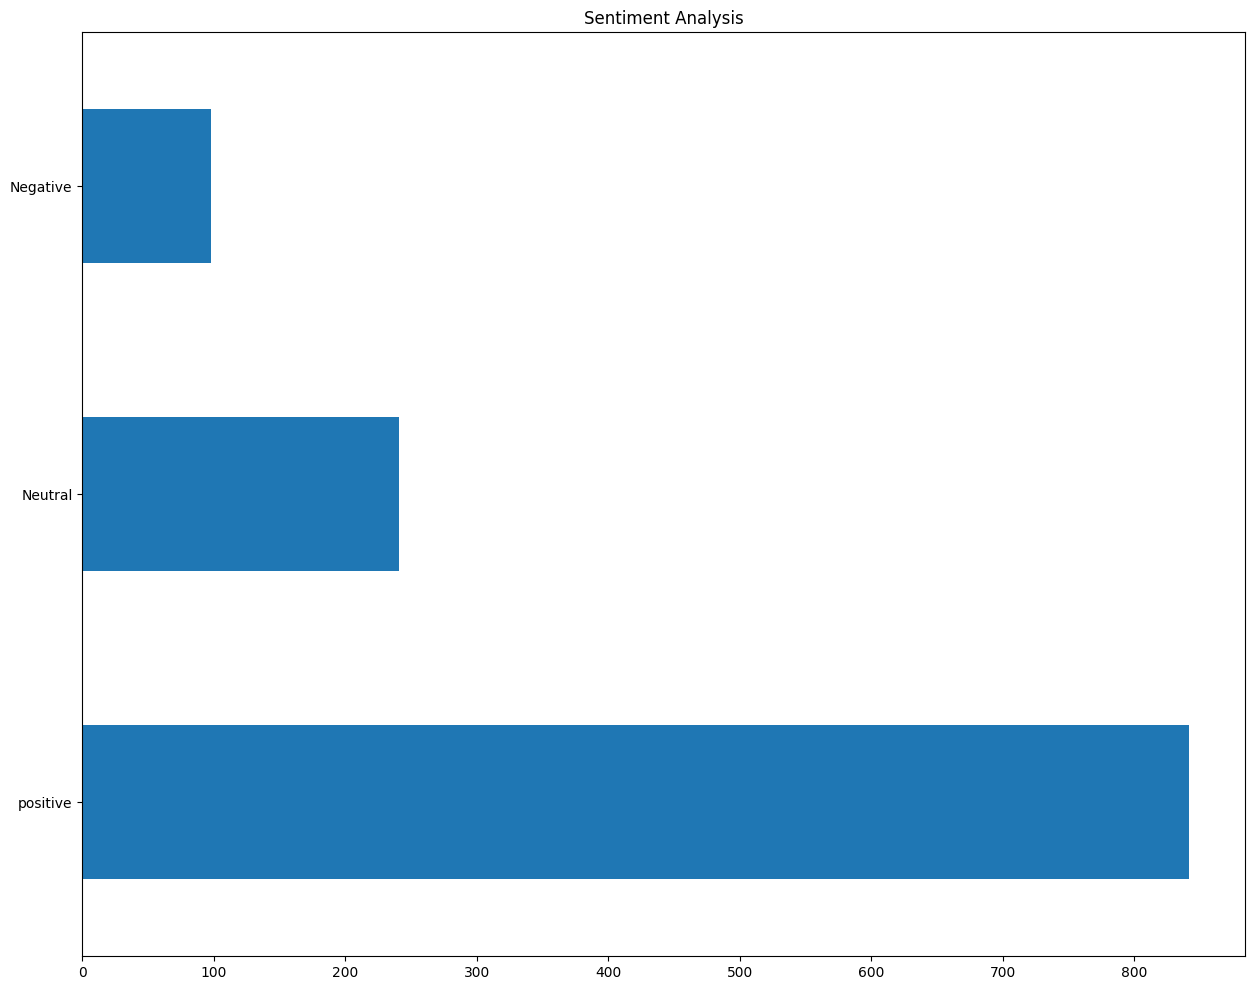

In [44]:
textblob_df["textblob_sentiment"].value_counts().plot.barh(title = 'Sentiment Analysis')

In [32]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='positive' ]

In [33]:
df_very_positive=df_positive[df_positive['likeCount']>0]

In [34]:
df_very_positive.head()

,renderedContent,textblob_sentiment,likeCount
3,"Partner | In the Women’s cricket league, RCB p...",positive,2
18,@HimalayaIndia “Beauty has no colour.” Proceed...,positive,13
22,@HimalayaIndia Not only women but everyone is ...,positive,1
24,Under The Raintree women's cultural festival \...,positive,1
42,@HimalayaIndia Those who judge men by the size...,positive,6


In [35]:
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative' ]

In [36]:
df_negative

,renderedContent,textblob_sentiment,likeCount
10,@HimalayaIndia as such you guys have delivered...,Negative,0
11,@HimalayaIndia Can you please explain what is ...,Negative,0
20,@JoBiddle3 @HimalayaIndia Indeed. False accusa...,Negative,0
27,Himalaya launches ‘Not Fair’ campaign in colla...,Negative,1
28,@HimalayaIndia I mean if someone in their sens...,Negative,0
...,...,...,...
1150,The #HimalayaWellnessCompany commemorates the ...,Negative,13
1161,@HimalayaIndia please sack the person who appr...,Negative,0
1165,@bindass_ladki @HimalayaIndia As Indians we ha...,Negative,4
1167,@HimalayaIndia from 2 years u had been purchas...,Negative,0


In [37]:
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral' ]

In [38]:
df_neutral

,renderedContent,textblob_sentiment,likeCount
0,@HimalayaIndia \nPlz improve your baby diaper ...,Neutral,0
1,Himalaya urges women to embrace their inner st...,Neutral,1
4,CSR #HimalayaBabyCare helps traveling mothers ...,Neutral,4
14,@NIMHANS_BLR @HimalayaIndia @MoHFW_INDIA @DHFW...,Neutral,0
15,@DeccanHerald coveted our #undertheraintree wo...,Neutral,1
...,...,...,...
1168,Actual MRP is ₹196.\n@bigbasket_com SP ₹220 th...,Neutral,0
1172,Same product.\n2 different pharmacies\n2 diffe...,Neutral,0
1173,"@KASHJTWITSS @HimalayaIndia Yes, i will thxji",Neutral,1
1175,@Matinde19122360 @HimalayaIndia Any update !!,Neutral,0


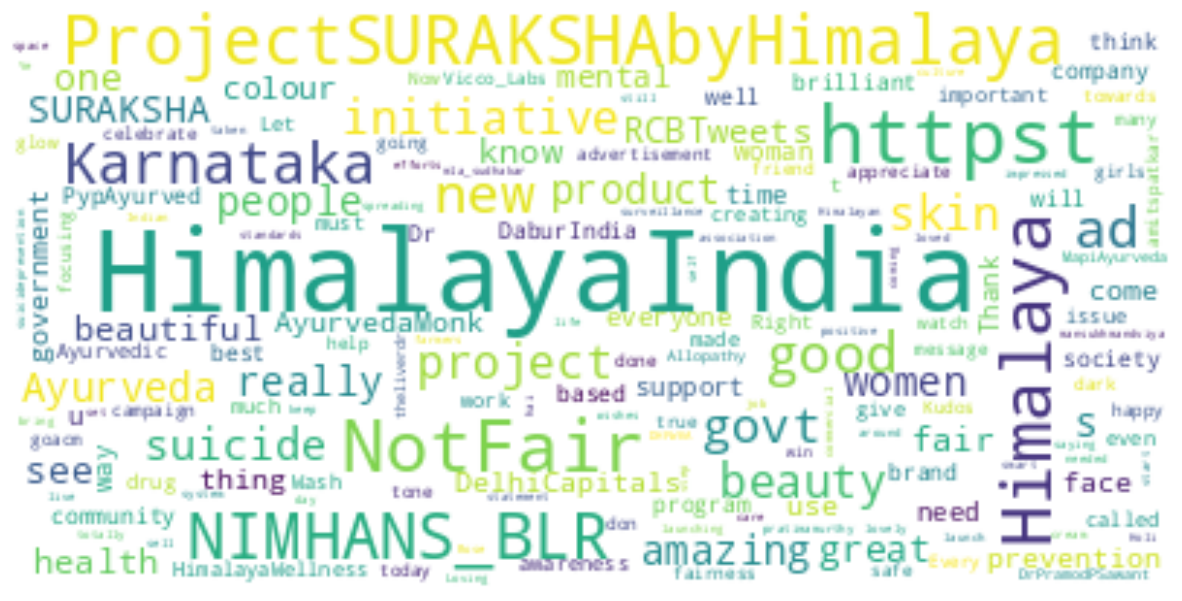

In [43]:
positive_tw =" ".join(t for t in df_very_positive.renderedContent)
word_cloud1 = WordCloud(collocations = False, background_color = 'white') .generate(positive_tw)
plt. imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

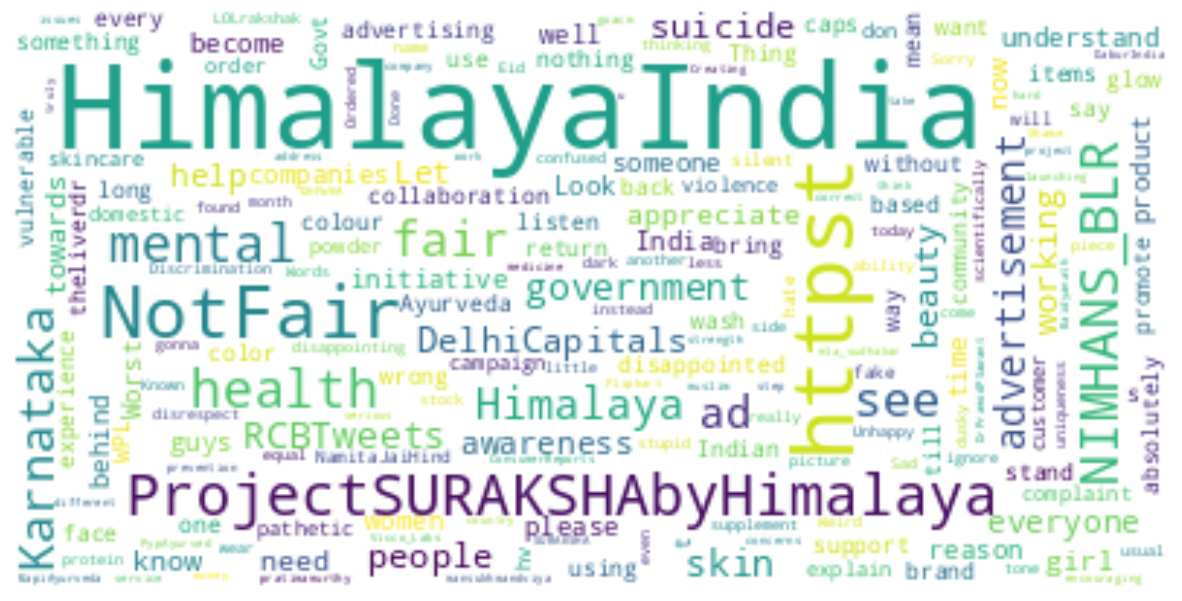

In [45]:
negative_tw =" ".join(t for t in df_negative.renderedContent)
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(negative_tw)
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

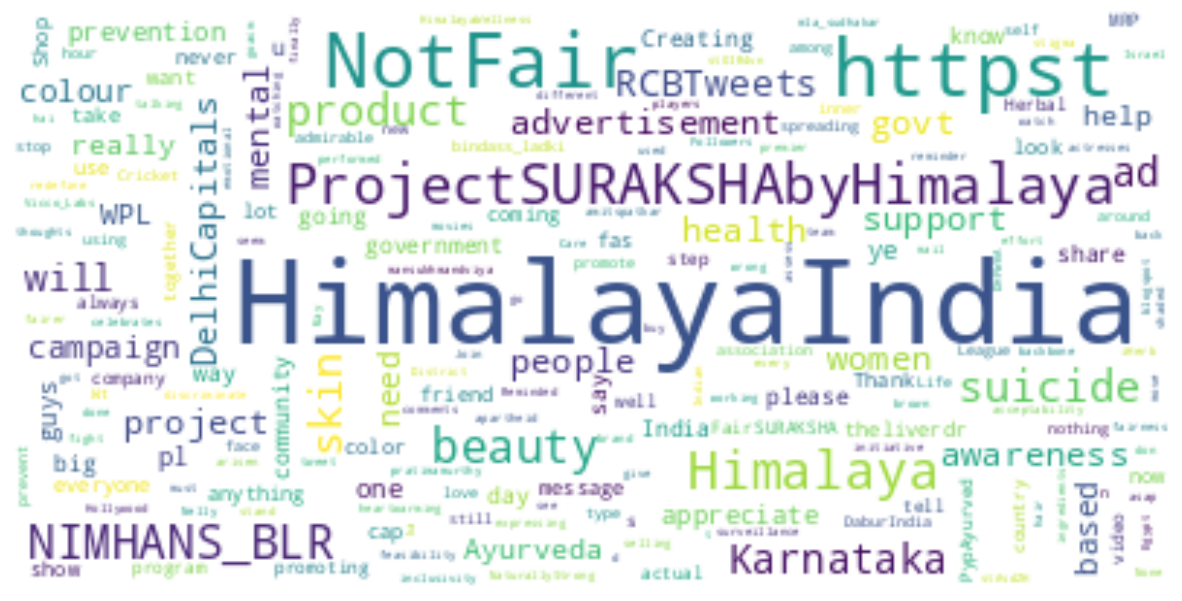

In [46]:
neutral_tw =" ".join(t for t in df_neutral.renderedContent)
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(neutral_tw)
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

# Topic Analysis

In [47]:
vect =TfidfVectorizer(stop_words='english',max_features=1000)
vect_text=vect.fit_transform(new_tweet_df['renderedContent'])

In natural language processing, Latent Dirichlet Allocation (LDA) is a generative statistical model that explains a set of observations through unobserved groups, and each group explains why some parts of the data are similar. The LDA is an example of a topic model. In this, observations (e.g., words) are collected into documents, and each word's presence is attributable to one of the document's topics. Each document will contain a small number of topics. 

In [48]:
lda_model=LatentDirichletAllocation(n_components=7,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [49]:
vocab = vect.get_feature_names_out()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:7]
     print("")
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
            print("")


Topic 0: 
himalayaindia 
sent 
theliverdr 
bindass_ladki 
products 
product 
bless 

Topic 1: 
karnataka 
projectsurakshabyhimalaya 
nimhans_blr 
himalayaindia 
suicide 
health 
mental 

Topic 2: 
bindass_ladki 
cute 
sir 
naked 
post 
update 
himalayaindia 

Topic 3: 
ayurveda 
pypayurved 
theliverdr 
himalayaindia 
products 
daburindia 
goacm 

Topic 4: 
thank 
person 
himalayaindia 
suicide 
got 
projectsurakshabyhimalaya 
prevention 

Topic 5: 
notfair 
himalayaindia 
httpst 
himalaya 
great 
really 
projectsurakshabyhimalaya 

Topic 6: 
mrp 
kashjtwitss 
different 
share 
himalayaindia 
iso 
jagograhakjago 
